<a href="https://colab.research.google.com/github/SamuelBFG/DL-studies/blob/master/IA353/EF1p3_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


# BASELINE MODEL

In [4]:
model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation=tf.nn.relu),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4307 - accuracy: 0.8707
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1370 - accuracy: 0.9576
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1047 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0906 - accuracy: 0.9716
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0786 - accuracy: 0.9749


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (32, 784)                 0         
_________________________________________________________________
dense (Dense)                (32, 512)                 401920    
_________________________________________________________________
dropout (Dropout)            (32, 512)                 0         
_________________________________________________________________
dense_1 (Dense)              (32, 10)                  5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


#### Test Accuracy

In [6]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0639 - accuracy: 0.9797


[0.06390675902366638, 0.9797000288963318]

#### Plot

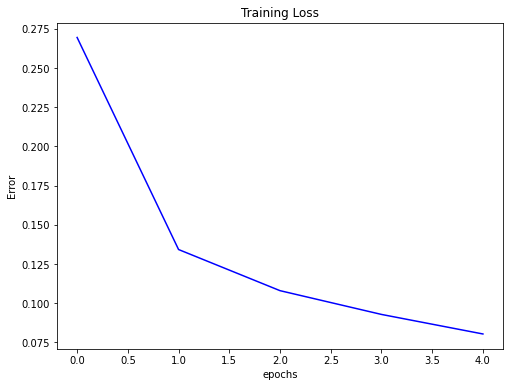

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))  
plt.plot(history.history['loss'], color='b')
plt.title('Training Loss')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.show()

In [8]:
model_json = model.to_json()
json_file = open("model_MLP.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("model_MLP.h5")
print("Model saved to disk")
os.getcwd()

Model saved to disk


'/content'

### Working with multiples executions:

In [9]:
executions = 5
histories = []
evaluations = []

for i in range(executions):
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                      ])
  
  print('## Training model number: ', i+1)

  model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
  
  histories.append(model.fit(x_train, y_train, epochs=5, verbose=0))

  print('#• Test set:')
  evaluations.append(model.evaluate(x_test, y_test))
  print('\n')

## Training model number:  1
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 0.0651 - accuracy: 0.9793


## Training model number:  2
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 0.0705 - accuracy: 0.9794


## Training model number:  3
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 0.0639 - accuracy: 0.9806


## Training model number:  4
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 0.0708 - accuracy: 0.9781


## Training model number:  5
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 0.0685 - accuracy: 0.9778




In [10]:
histories[0].history.keys()

dict_keys(['loss', 'accuracy'])

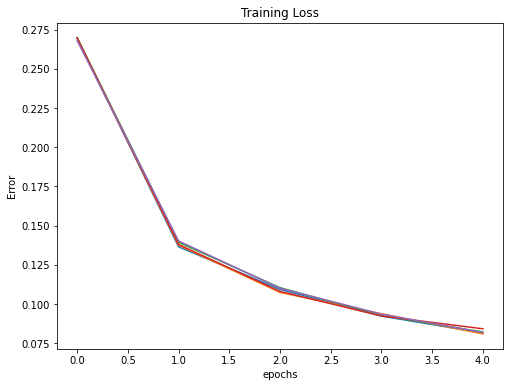

In [12]:
plt.figure(figsize=(8, 6))  
plt.xlabel('epochs')
plt.ylabel('Error')
plt.title('Training Loss')
for i in range(executions):
  plt.plot(histories[i].history['loss'])
plt.show()

In [13]:
histories[-1].history['accuracy'] # Last training acc log per epochs

[0.92044997215271,
 0.9565833210945129,
 0.9660999774932861,
 0.9712666869163513,
 0.9734500050544739]

In [14]:
evaluations[0] # Loss and acc for the first model (LIST)

[0.06509893387556076, 0.9793000221252441]

In [15]:
acc_val = []
acc_test = []

for i in range(executions):
  acc_val.append(sum(histories[i].history['accuracy']) / len(histories[i].history['accuracy']))
  acc_test.append(evaluations[i][1])

acc_val

[0.9578366756439209,
 0.9582333326339721,
 0.9577299952507019,
 0.957859992980957,
 0.9575699925422668]

In [16]:
acc_test

[0.9793000221252441,
 0.9793999791145325,
 0.9805999994277954,
 0.9781000018119812,
 0.9778000116348267]

#### Average validation accuracy (training set)

In [17]:
avg_acc_val = sum(acc_val)/len(acc_val)
avg_acc_val

0.9578459978103637

#### Average test accuracy

In [18]:
avg_acc_test = sum(acc_test)/len(acc_test)
avg_acc_test

0.979040002822876

# MODIFIED MODEL

• Goal: Better test accuracy results

### Holdout

In [19]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


One-hot encoding train and test labels:

In [20]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

20% for validation set

80% for training set

In [21]:
from sklearn.model_selection import train_test_split
train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=261663)

In [22]:
print('train_data shape:', x_train.shape)
print('train_data_val shape:', train_data_val.shape)
print('train_labels shape:', y_train.shape)
print('train_labels_val shape:', train_labels_val.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


train_data shape: (60000, 28, 28)
train_data_val shape: (12000, 28, 28)
train_labels shape: (60000, 10)
train_labels_val shape: (12000, 10)
x_test shape: (10000, 28, 28)
y_test shape: (10000, 10)


In [23]:
train_data = tf.expand_dims(train_data, axis=-1)
train_data_val = tf.expand_dims(train_data_val, axis=-1)

x_test = tf.expand_dims(x_test, axis=-1)

### Model

Inspired by [LeNet-5, 1998](https://ieeexplore.ieee.org/document/726791), the architecture follows the structure: conv->pool->conv->pool->fc->output

Modifications:

• Adam with learning rate 0.001

• Mini-batch size of 64

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D


model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))

model.add(Dense(10, activation = "softmax"))

In [25]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               401664    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [26]:
from keras.optimizers import Adam
model.compile(optimizer = Adam(lr=0.001),
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

In [27]:
history = model.fit(train_data, train_labels,
                    batch_size = 64, 
                    epochs = 25, 
                    validation_data = (train_data_val, train_labels_val), verbose = 2)

Epoch 1/25
750/750 - 32s - loss: 0.1612 - accuracy: 0.9519 - val_loss: 0.0531 - val_accuracy: 0.9835
Epoch 2/25
750/750 - 2s - loss: 0.0520 - accuracy: 0.9841 - val_loss: 0.0420 - val_accuracy: 0.9882
Epoch 3/25
750/750 - 2s - loss: 0.0347 - accuracy: 0.9894 - val_loss: 0.0319 - val_accuracy: 0.9910
Epoch 4/25
750/750 - 2s - loss: 0.0260 - accuracy: 0.9921 - val_loss: 0.0328 - val_accuracy: 0.9898
Epoch 5/25
750/750 - 2s - loss: 0.0195 - accuracy: 0.9937 - val_loss: 0.0401 - val_accuracy: 0.9898
Epoch 6/25
750/750 - 2s - loss: 0.0150 - accuracy: 0.9953 - val_loss: 0.0347 - val_accuracy: 0.9894
Epoch 7/25
750/750 - 2s - loss: 0.0127 - accuracy: 0.9959 - val_loss: 0.0312 - val_accuracy: 0.9912
Epoch 8/25
750/750 - 2s - loss: 0.0111 - accuracy: 0.9963 - val_loss: 0.0272 - val_accuracy: 0.9927
Epoch 9/25
750/750 - 2s - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.0459 - val_accuracy: 0.9896
Epoch 10/25
750/750 - 2s - loss: 0.0080 - accuracy: 0.9975 - val_loss: 0.0474 - val_accuracy: 0.988

### Test Accuracy

In [28]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0436 - accuracy: 0.9907


[0.043568532913923264, 0.9907000064849854]

## Plot

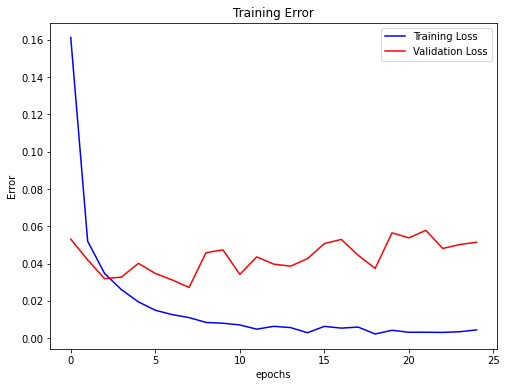

In [29]:
plt.figure(figsize=(8, 6))  
plt.plot(history.history['loss'], color='b')
plt.plot(history.history['val_loss'], color='r')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.legend(('Training Loss', 'Validation Loss'))
plt.show()

### Working with multiples executions:

In [30]:
executions = 5
histories = []
evaluations = []

for i in range(executions):
  tf.keras.backend.clear_session()
  model = 0
  model = Sequential()
  model.add(Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', 
                 activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(256, activation = "relu"))
  model.add(Dense(10, activation = "softmax"))
  
  print('## Training model number: ', i+1)

  model.compile(optimizer = Adam(lr=0.001),
                loss = "categorical_crossentropy",
                metrics=['accuracy'])
  
  histories.append(model.fit(train_data, train_labels,
                             batch_size = 64, 
                             epochs = 8, 
                             validation_data = (train_data_val, train_labels_val), verbose = 0))

  print('#• Test set:')
  evaluations.append(model.evaluate(x_test, y_test))
  print('\n')

## Training model number:  1
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 0.0360 - accuracy: 0.9890


## Training model number:  2
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 0.0271 - accuracy: 0.9920


## Training model number:  3
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 0.0391 - accuracy: 0.9894


## Training model number:  4
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 0.0351 - accuracy: 0.9911


## Training model number:  5
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 0.0335 - accuracy: 0.9900




In [31]:
histories[0].history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Plot

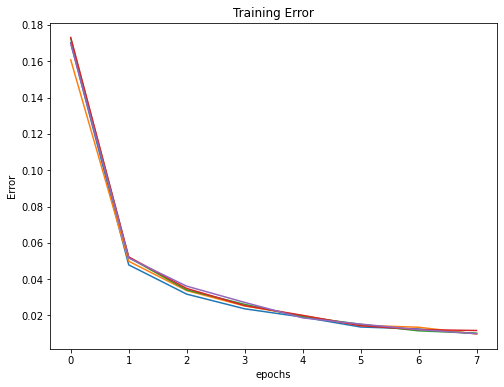

In [32]:
plt.figure(figsize=(8, 6))  
plt.title('Training Error')
plt.xlabel('epochs')
plt.ylabel('Error')

for i in range(executions):
  plt.plot(histories[i].history['loss'])
plt.show()

In [33]:
evaluations[0]

[0.03595028072595596, 0.9890000224113464]

In [34]:
acc_val = []
acc_test = []

for i in range(executions):
  acc_val.append(sum(histories[i].history['val_accuracy']) / len(histories[i].history['val_accuracy']))
  acc_test.append(evaluations[i][1])

acc_val

[0.9889687523245811,
 0.9881354197859764,
 0.9884166717529297,
 0.9880729168653488,
 0.9878958389163017]

In [35]:
acc_test

[0.9890000224113464,
 0.9919999837875366,
 0.9894000291824341,
 0.991100013256073,
 0.9900000095367432]

#### Average validation accuracy (validation set)

In [36]:
avg_acc_val = sum(acc_val)/len(acc_val)
avg_acc_val

0.9882979199290276

#### Average test accuracy

In [37]:
avg_acc_test = sum(acc_test)/len(acc_test)
avg_acc_test

0.9903000116348266